# A Data Science Case Study with Python: Part 2

Make sure you are familiar with Chapters 1 & 2 of Nathan George's book [Practical Data Science with
Python](https://www.packtpub.com/product/practical-data-science-with-python/9781801071970).
 before diving into this notebook.

We work with the [City of Montreal 311 data
set](https://data.montreal.ca/dataset/5866f832-676d-4b07-be6a-e99c21eb17e4/resource/2cfa0e06-9be4-49a6-b7f1-ee9f2363a872/download/requetes311.csv). This is the *second* notebook in a sequence; please check the [first part](https://github.com/satuelisa/Requetes311/blob/main/CaseStudy.ipynb) if you landed here via some other route. regardless, we will reload the data in the first cells.

In [1]:
import os.path # load a library
filename = 'requetes311.csv' # put the filename in a string variable
if os.path.isfile(filename): # check if the file exists
    print('We have the data at hand.') # what to print out if it does
else: # and what to do if not
    print('ERROR: Please download the data and put it in this same directory')

We have the data at hand.


Now, we load the data into a Pandas data frame and see what we got in terms of rows and columns. Since this is a rather large file, this might take a while. Be patient.

In [2]:
import pandas as pd # for a local installation, use pip to get pandas
print('Attempting to load the data. (Do NOT click run again.)')
# load CSV-formatted data from a file (Chapter 3 shows other ways to read data)
data = pd.read_csv(filename, low_memory = False) # explanation below
rows, cols = data.shape # consult the shape of the resulting data
print(f'There are {rows} and {cols} columns')
cells = rows * cols
assert cells == data.size # we can check this directly, too

Attempting to load the data. (Do NOT click run again.)
There are 4635093 and 29 columns


That second parameter in `read_csv` is to avoid a `DtypeWarning` that would surge because of some of the columns have both numerical and textual information. We can circumvent it for now by letting the data occupy more space instead of optimizing to fit either numbers or text in each field.

What do those columns store? Let's take a look at the *header* of the data frame that by default is the first row of the CSV file (see Chapter 3 for more information and also what to do if the file is in Excel format instead).

## Geographical aspects

There are latitudes (`LOC_LAT`) and longitudes in there (`LOC_LONG`). Let's look at the statistics, keeping in mind that Montreal is at 45.5017 North (positive, South would be negative) and 73.5673 West (negative, East would be positive).

In [3]:
pd.set_option('display.float_format', lambda x: '%.4f' % x) # show four decimal places
print('\nLatitude')
print(data['LOC_LAT'].describe())
print('\nLongitude')
print(data['LOC_LONG'].describe())


Latitude
count   2279008.0000
mean         45.5331
std           0.1152
min          -0.0000
25%          45.4979
50%          45.5287
75%          45.5677
max          45.7038
Name: LOC_LAT, dtype: float64

Longitude
count   2279008.0000
mean        -73.6171
std           0.0756
min         -76.2373
25%         -73.6504
50%         -73.6016
75%         -73.5689
max         -73.4791
Name: LOC_LONG, dtype: float64


Those minimums around zero do not sound correct fot the latitudes. Let's look at them in more detail.

In [4]:
data.loc[data['LOC_LAT'] < 1]

ID_UNIQUE   NATURE                     ACTI_NOM TYPE_LIEU_INTERV  \
3191744  19-325833  Requete                 Eau - Divers     Intersection   
4246065   16-98270  Requete  Nettoyage du domaine public          Troncon   
4251838   16-93011  Requete                 Nid-de-poule          Troncon   
4287483   16-60515  Requete       IRP - Fermeture de rue          Troncon   
4288065   16-59984  Requete                 Nid-de-poule          Troncon   
4288650   16-59450  Requete                 Nid-de-poule          Troncon   
4289385   16-58785  Requete                 Nid-de-poule          Troncon   
4292313   16-56106  Requete                 Nid-de-poule          Troncon   
4296927   16-51881  Requete             *Déneigeur privé          Troncon   
4305363   16-44224  Requete       IRP - Fermeture de rue          Troncon   
4406780   16-30776  Requete              Voirie - Divers          Troncon   

                 RUE RUE_INTERSECTION1      RUE_INTERSECTION2  LOC_ERREUR_GDT  \
3191744          NaN               NaN                    NaN          0.0000   
4246065  rue Provost        avenue 19e             avenue 20e          0.0000   
4251838  rue Provost        avenue 36e             avenue 37e          0.0000   
4287483  rue Provost         avenue 8e              avenue 9e          0.0000   
4288065   avenue 11e    rue Notre-Dame  rue William-MacDonald          0.0000   
4288650   avenue 11e    rue Notre-Dame  rue William-MacDonald          0.0000   
4289385   avenue 11e    rue Notre-Dame  rue William-MacDonald          0.0000   
4292313  rue Provost        avenue 36e             avenue 37e          0.0000   
4296927   avenue 10e       rue Provost         rue Sherbrooke          0.0000   
4305363  rue Provost         avenue 8e              avenue 9e          0.0000   
4406780   avenue 13e    rue Sherbrooke            rue Provost          0.0000   

                                 ARRONDISSEMENT ARRONDISSEMENT_GEO  ...  \
3191744  Villeray-Saint-Michel - Parc-Extension                NaN  ...   
4246065                                 Lachine                NaN  ...   
4251838                                 Lachine                NaN  ...   
4287483                                 Lachine                NaN  ...   
4288065                                 Lachine                NaN  ...   
4288650                                 Lachine                NaN  ...   
4289385                                 Lachine                NaN  ...   
4292313                                 Lachine                NaN  ...   
4296927                                 Lachine                NaN  ...   
4305363                                 Lachine                NaN  ...   
4406780                                 Lachine                NaN  ...   

        PROVENANCE_MOBILE PROVENANCE_MEDIASOCIAUX PROVENANCE_SITEINTERNET  \
3191744                 0                       0                       0   
4246065                 0                       0                       0   
4251838                 0                       0                       0   
4287483                 0                       0                       0   
4288065                 0                       0                       0   
4288650                 0                       0                       0   
4289385                 0                       0                       0   
4292313                 0                       0                       0   
4296927                 0                       0                       0   
4305363                 0                       0                       0   
4406780                 0                       0                       0   

                             UNITE_RESP_PARENT  LOC_LONG  LOC_LAT   LOC_X  \
3191744  VILLERAY - ST-MICHEL - PARC-EXTENSION  -76.2373  -0.0000 -1.0000   
4246065                                LACHINE  -76.2373   0.0000  0.0000   
4251838                                LACHINE  -76.23

Looks like someone somehow forgot to register those. Let's plot the *others* .

<AxesSubplot:xlabel='LOC_LONG', ylabel='LOC_LAT'>

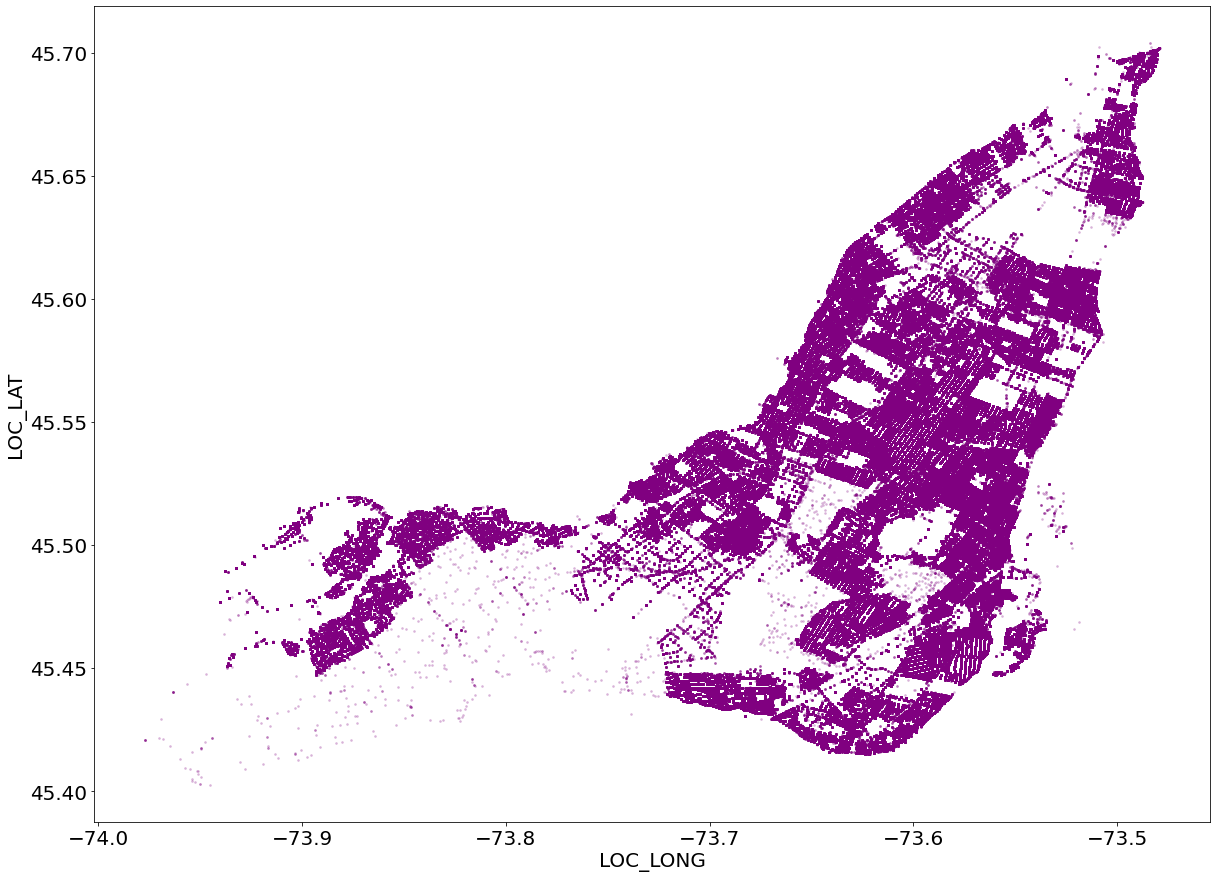

In [5]:
valid = data.loc[data['LOC_LAT'] > 40] # at least be near Canada in terms of the latitude
# small and semitransparent dots to help visualize density
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [ 20, 15 ] # bigger plots
font = { 'size'   : 20 } # bigger font
plt.rc('font', **font)

valid.plot.scatter(x = 'LOC_LONG', y = 'LOC_LAT', s = 3, alpha = 0.2, color = 'purple') 

This would be way cooler on a map. First, we need to find open data for a map of Montreal. Luckily there is a [portal just for that](https://open.canada.ca/data/en/dataset?q=montreal&organization=qc&jurisdiction=municipal&frequency=irregular&collection=fgp&res_format=GEOJSON&sort=) and [the map of the polygons of the administrative limits](https://data.montreal.ca/dataset/00bd85eb-23aa-4669-8f1b-ba9a000e3dd8/resource/e9b0f927-8f75-458c-8fda-b5da65cc8b73/download/limadmin.geojson) sounds promising. Let's save that GeoJSON file locally in the same folder with the CSV data as `limadmin.geojson`. We can overlay this on a map of Canada, if we wish. And on that, we can download and overlay [the regions of Quebec](https://gist.github.com/carmoreira/73f4d87b7c42834669dd8f734b1e3a58#file-quebec_regions-geojson) if we download that, too.

/home/elisa/.local/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


<AxesSubplot:>

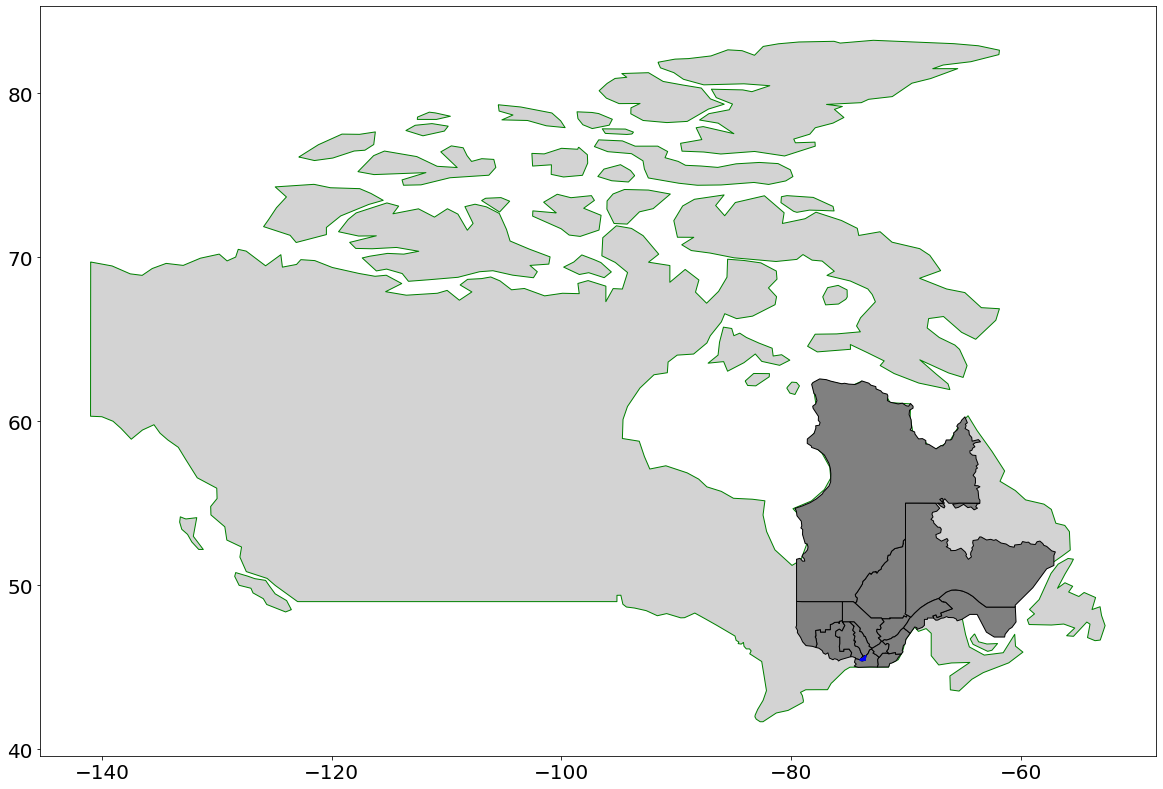

In [6]:
import geopandas as gpd # install with pip for your local python installation
countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) # fetch
fig, ax = plt.subplots(1, 1) # we want to plot many things on the same figure
canada = countries[countries['name'] == 'Canada']
canada.plot(edgecolor = 'green', color = 'lightgray', ax = ax)
quebec = gpd.read_file('quebec_regions.geojson')
quebec.plot(edgecolor = 'black', color = 'gray', ax = ax) # on the same plot
montreal = gpd.read_file('limadmin.geojson')
montreal.plot(edgecolor = 'blue', color = 'black', ax = ax)

We could [use a real map as background](https://geopandas.org/en/stable/gallery/plotting_basemap_background.html) and varying levels of transparency (`alpha`) on the indicated areas.

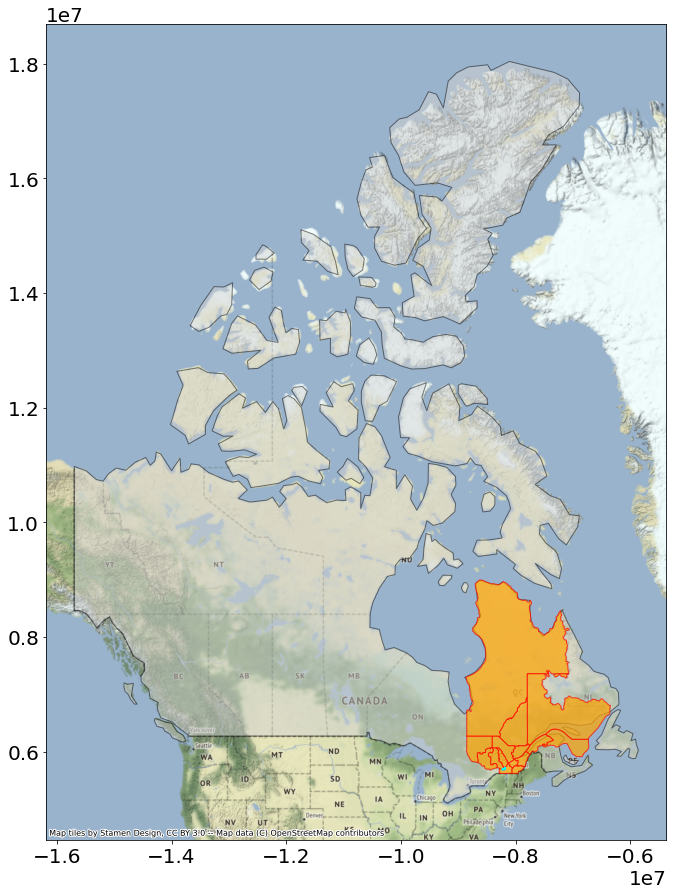

In [7]:
import contextily as cx # install with pip

webmercator = 3857 
# ensure a coordinate system compatible with maps on the web

c = canada.to_crs(epsg = webmercator)
q = quebec.to_crs(epsg = webmercator)
m = montreal.to_crs(epsg = webmercator)

fig, ax = plt.subplots(1, 1)
c.plot(edgecolor = 'black', color = 'lightgray', alpha = 0.5, ax = ax)
q.plot(edgecolor = 'red', color = 'orange', alpha = 0.7, ax = ax) 
m.plot(edgecolor = 'cyan', color = 'blue', alpha = 0.9, ax = ax)
cx.add_basemap(ax)

We barely notice Montreal since Canada is way too big. We have to zoom in. In fact, best ditch the country altogether and just plot Quebec and Montreal.

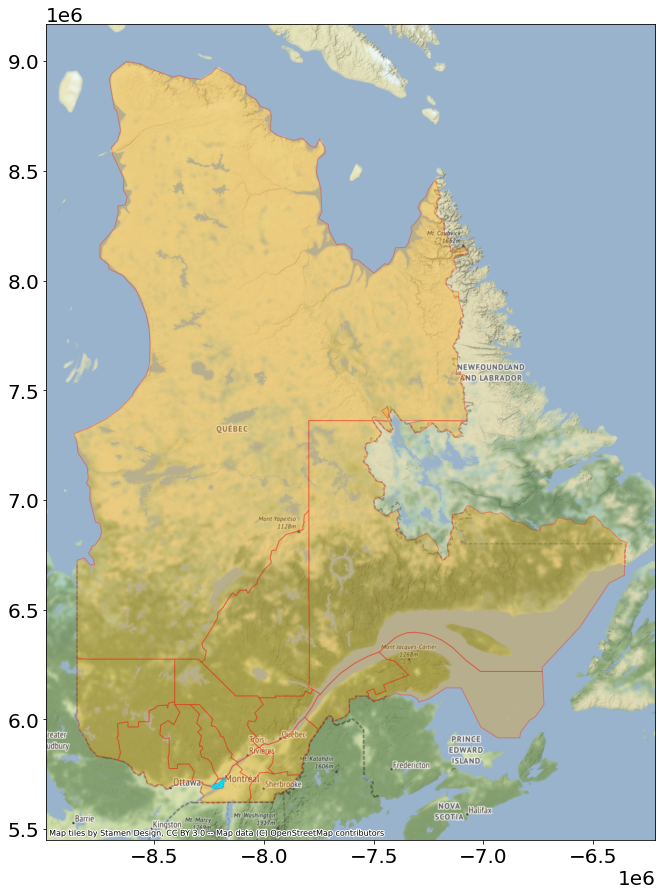

In [8]:
fig, ax = plt.subplots(1, 1)
q.plot(edgecolor = 'red', color = 'orange', alpha = 0.3, ax = ax) 
m.plot(edgecolor = 'cyan', color = 'blue', alpha = 0.5, ax = ax)
cx.add_basemap(ax)

Yeah, Quebec is too big, too. Let's just keep the administrative limits

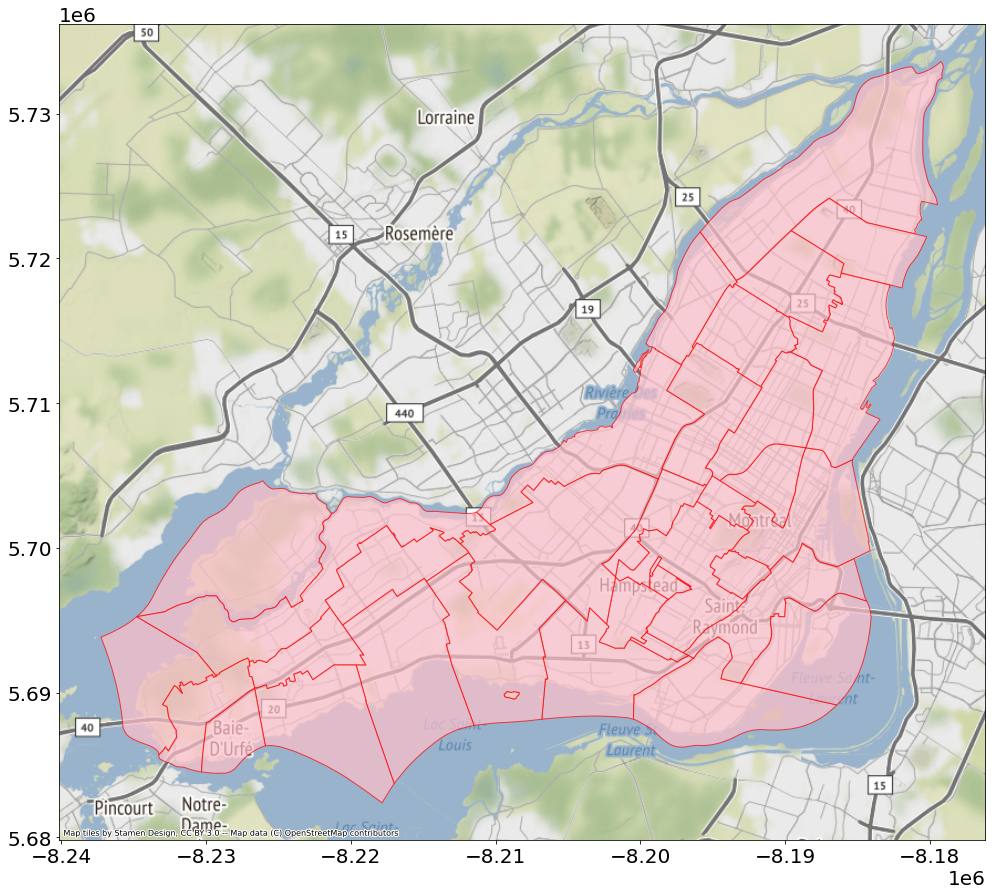

In [9]:
fig, ax = plt.subplots(1, 1)
m.plot(edgecolor = 'red', color = 'pink', alpha = 0.7, ax = ax)
cx.add_basemap(ax)

So, how do we plot the data set onto this map? Let's return to the non-background variant for a bit.

<AxesSubplot:xlabel='LOC_LONG', ylabel='LOC_LAT'>

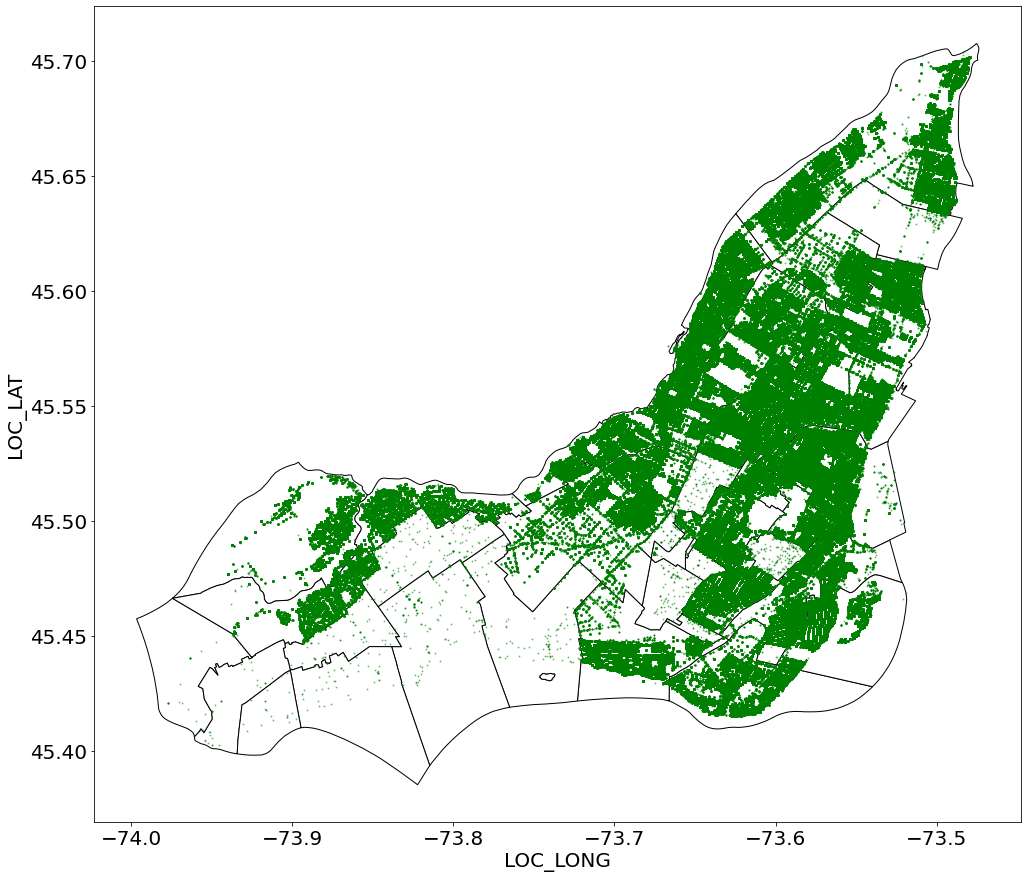

In [10]:
fig, ax = plt.subplots(1, 1)
montreal.plot(edgecolor = 'black', color = 'white', ax = ax)
valid.plot.scatter(x = 'LOC_LONG', y = 'LOC_LAT', s = 1, alpha = 0.4, 
                   color = 'green', ax = ax) 

We could zoom in on a zone of interest by controlling the axes.

(45.46, 45.52)

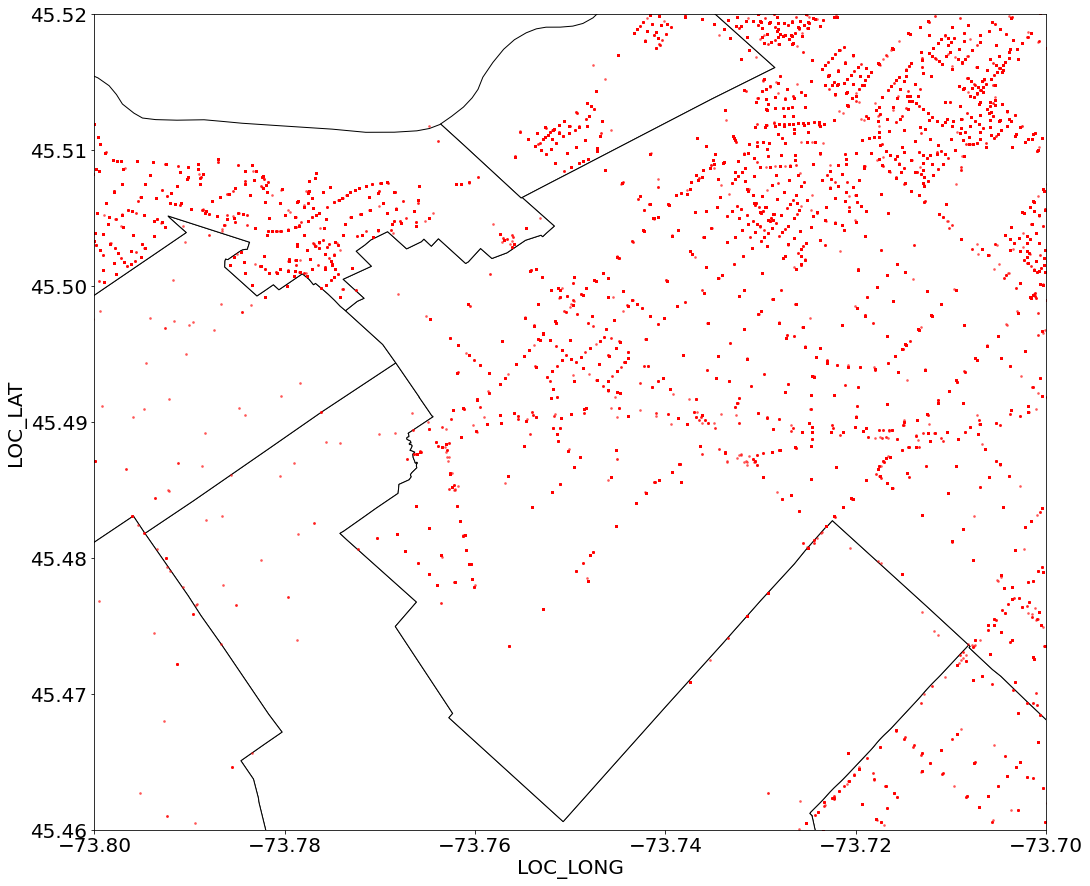

In [11]:
fig, ax = plt.subplots(1, 1)
montreal.plot(edgecolor = 'black', color = 'white', ax = ax)
valid.plot.scatter(x = 'LOC_LONG', y = 'LOC_LAT', s = 3, 
                   alpha = 0.5, color = 'red', ax = ax) 
plt.xlim([-73.8, -73.7])
plt.ylim([45.46, 45.52])

Yes, maps are neat. Many of the points seem to be on streets. We can test this hypothesis informally by drawing the streets, too. Download the street data into [`geobase.json`](https://donnees.montreal.ca/ville-de-montreal/geobase). 

Adding the streets. This takes a VERY long time.
Coordinate system epsg:4326


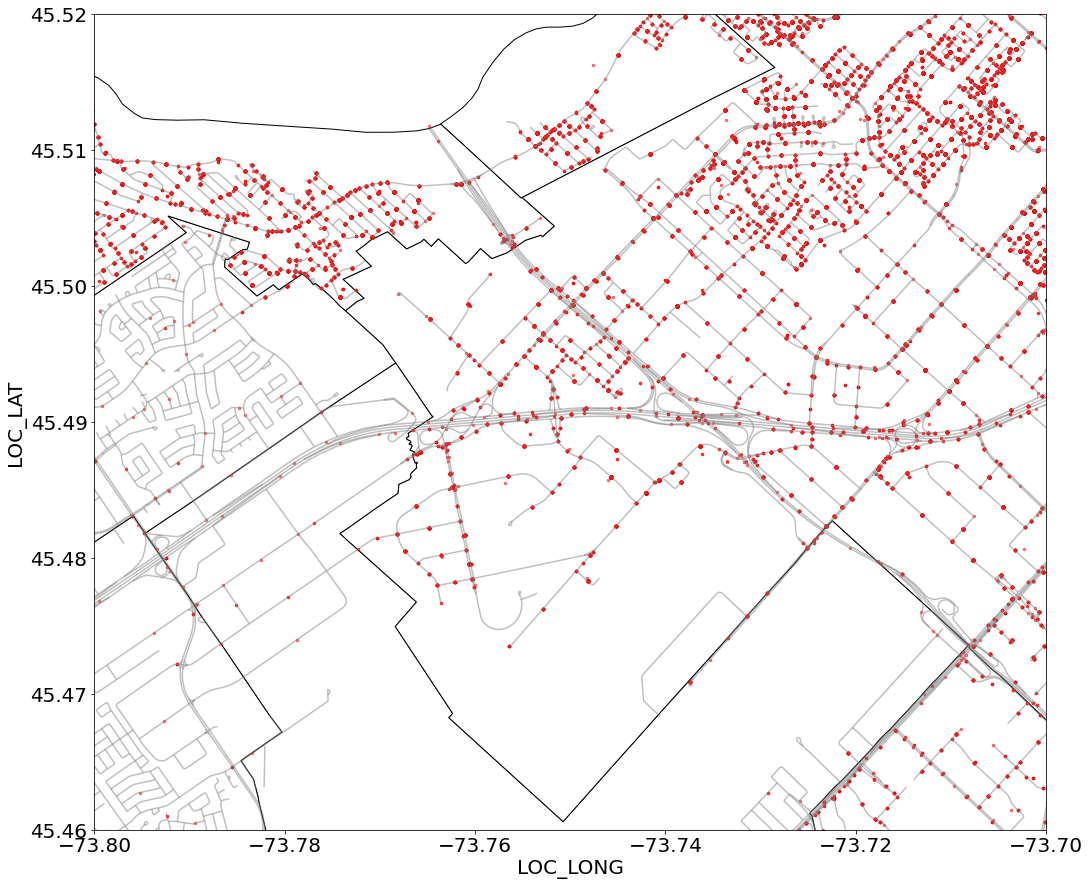

In [12]:
streets = gpd.read_file('geobase.json') # this is huge, the drawing will take a long while
fig, ax = plt.subplots(1, 1)
montreal.plot(edgecolor = 'black', color = 'white', ax = ax)
plt.xlim([-73.8, -73.7])
plt.ylim([45.46, 45.52])
streets.plot(color = 'gray', ax = ax, alpha = 0.5)
print('Adding the streets. This takes a VERY long time.')
valid.plot.scatter(x = 'LOC_LONG', y = 'LOC_LAT', s = 6, 
                   alpha = 0.5, color = 'red', ax = ax) 
print('Coordinate system', streets.crs) # what coordinate system is this anyhow?

And if we want the background map instead of the street data? We need a georeferenced version of the data. 

In [13]:
print('Building a geo-referenced data frame (this takes a little while)')
vll = gpd.GeoDataFrame(valid, 
                     geometry = gpd.points_from_xy(valid.LOC_LONG, valid.LOC_LAT),
                     crs = 4326) # start with longitude and latitude
v = vll.to_crs(webmercator) # to the same projection
print('Done')

Building a geo-referenced data frame (this takes a little while)
Done


Now we can draw that on top of the web-mercator version of Montreal. Since drawing all the records is very slow, we can just use a random sample.

Plotting 100 records at random
Adding the background map


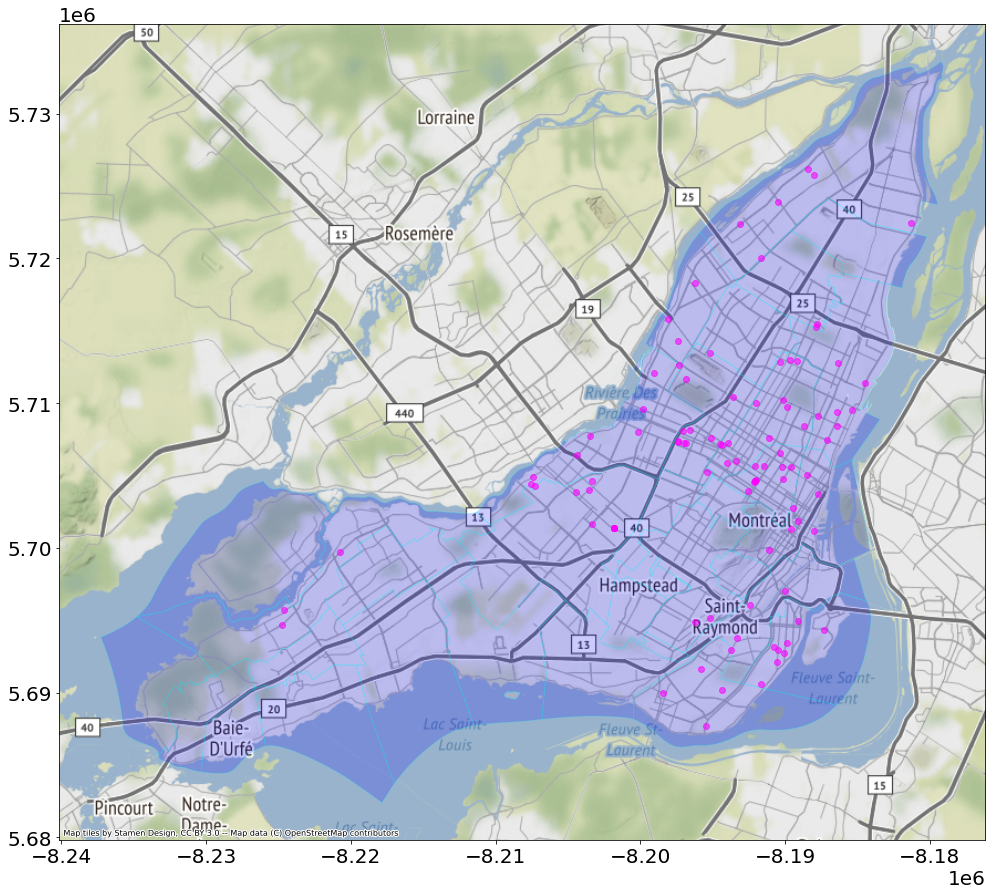

In [14]:
fig, ax = plt.subplots(1, 1)
m.plot(edgecolor = 'cyan', color = 'blue', alpha = 0.2, ax = ax)
k = 100
print(f'Plotting {k} records at random')
some = v.sample(k)
some.plot(color = 'magenta', alpha = 0.6, ax = ax) 
print('Adding the background map')
cx.add_basemap(ax)

Now, suppose we prefer using the street information instead of a background map. 

Since loading *all* of the streets takes so long, we should just make a smaller version with only Montreal streets in it. 

We have a data frame of the Quebec regions, so we can surely find a polygon to represent Montreal there.

In [15]:
print(quebec)

    cartodb_id  res_co_reg  regio_s_id  regio_s_ res_co_ver res_co_ref  \
0           10           7          12        11   V2012-05     BDGA1M   
1            4           2           6         5   V2012-05     BDGA1M   
2            5          11           7         6   V2012-05     BDGA1M   
3            7           8           9         8   V2012-05     BDGA1M   
4            8           4          10         9   V2012-05     BDGA1M   
5            9           3          11        10   V2012-05     BDGA1M   
6           11          15          13        12   V2012-05     BDGA1M   
7           13          12          15        14   V2012-05     BDGA1M   
8           12          14          14        13   V2012-05     BDGA1M   
9           15          16          17        16   V2012-05     BDGA1M   
10          16           5          18        17   V2012-05     BDGA1M   
11          19          10           1        20   V2012-05     BDGA1M   
12          17           6          19

There it is: we want the `geometry` of the row on which `res_nm_reg` says "Montréal".

In [16]:
city = quebec[quebec['res_nm_reg'] == 'Montréal'].geometry
print(city)
print(len(streets), 'streets in total')
citystreets = streets.clip(city) # install the pygeos package with pip
print(len(citystreets), 'of them in Montreal')

12    POLYGON ((-73.52311 45.69786, -73.47436 45.700...
Name: geometry, dtype: geometry
47723 streets in total
45973 of them in Montreal


Well, that was not a huge savings, but it's something.

To understand more of what is happening with the rest of the data, we can start by looking at the columns that only have a handful of unique values. Let's filter out which columns have less than ten unique values:

In [18]:
counts = data.nunique(axis = 0)
few = [ data.columns[i] for i in range(cols) if counts[i] < 10 ]
for c in few: # take a look at the values
    for value in data[c].unique():
        print(f'Column <{c}> can take on the value "{value}"')
    print('') # just a blank line between columns

Column <NATURE> can take on the value "Information"
Column <NATURE> can take on the value "Commentaire"
Column <NATURE> can take on the value "Requete"
Column <NATURE> can take on the value "Plainte"

Column <TYPE_LIEU_INTERV> can take on the value "nan"
Column <TYPE_LIEU_INTERV> can take on the value "Adresse"
Column <TYPE_LIEU_INTERV> can take on the value "Troncon"
Column <TYPE_LIEU_INTERV> can take on the value "Intersection"
Column <TYPE_LIEU_INTERV> can take on the value "Installation"

Column <LOC_ERREUR_GDT> can take on the value "nan"
Column <LOC_ERREUR_GDT> can take on the value "1.0"
Column <LOC_ERREUR_GDT> can take on the value "0.0"

Column <PROVENANCE_ORIGINALE> can take on the value "Téléphone"
Column <PROVENANCE_ORIGINALE> can take on the value "Personne"
Column <PROVENANCE_ORIGINALE> can take on the value "Courriel"
Column <PROVENANCE_ORIGINALE> can take on the value "Télécopieur"
Column <PROVENANCE_ORIGINALE> can take on the value "Courrier"
Column <PROVENANCE_ORIGINA

There were some records (rows) that had cells (values) set to `nan` (for example in `LOC_ERREUR_GDT`) which probably means 'NaN' to indicate that the value is *not available*. We can try to set the string 'nan' to a NaN just in case; often people who populate data sheets use their own notation to indicate that a value is not available and consistency is needed.

Additionally, it may come handy to know how many NAs there are: `isna` will produce `True` or `False` for each cell to indicate whether or not the value is "Not Available". If we sum over that data frame of pure truth values, we find out how many there are in total per column.

So, let's check how many NAs there are, and then see if substituting any 'nan' strings makes a difference.

In [19]:
NAs = data.isna().sum()
print(NAs)
print('Before (total)', NAs.sum()) # how many NaN there are 
data = data.replace('nan', pd.NA) # make those nan into NaN
NAs = data.isna().sum() # update the value of NaNs
print('After (total)', NAs.sum()) # how many there are now

ID_UNIQUE                  2355302
NATURE                           0
ACTI_NOM                         0
TYPE_LIEU_INTERV           2355328
RUE                        2742029
RUE_INTERSECTION1          4269275
RUE_INTERSECTION2          4269427
LOC_ERREUR_GDT             2355987
ARRONDISSEMENT             2355328
ARRONDISSEMENT_GEO         2356229
LIN_CODE_POSTAL            2891426
DDS_DATE_CREATION                0
PROVENANCE_ORIGINALE          4208
PROVENANCE_TELEPHONE             0
PROVENANCE_COURRIEL              0
PROVENANCE_PERSONNE              0
PROVENANCE_COURRIER              0
PROVENANCE_TELECOPIEUR           0
PROVENANCE_INSTANCE              0
PROVENANCE_MOBILE                0
PROVENANCE_MEDIASOCIAUX          0
PROVENANCE_SITEINTERNET          0
UNITE_RESP_PARENT                0
LOC_LONG                   2356085
LOC_LAT                    2356085
LOC_X                      2356085
LOC_Y                      2356085
DERNIER_STATUT             2355302
DATE_DERNIER_STATUT 

Let's make pie charts for each of these so we can visualize how these possible values are distributed in terms of their frequency.


Value frequencies for column <NATURE>:
Information: 2355302
Commentaire: 2221185
Requete: 34523
Plainte: 24083

Value frequencies for column <TYPE_LIEU_INTERV>:
nan: 1882958
Adresse: 285967
Troncon: 80072
Intersection: 30768

Value frequencies for column <LOC_ERREUR_GDT>:
nan: 2154146
1.0: 124960

Value frequencies for column <PROVENANCE_ORIGINALE>:
Téléphone: 3542360
Personne: 881342
Courriel: 117124
Télécopieur: 47012
Courrier: 25278
Mobile: 13899
Médias sociaux: 2752
Internet: 792
Instance: 326

Value frequencies for column <PROVENANCE_COURRIER>:
0: 4621113
1: 13844
2: 116
3: 14
5: 4
4: 1
6: 1

Value frequencies for column <PROVENANCE_TELECOPIEUR>:
0: 4634294
1: 724
2: 60
3: 9
5: 4
4: 2

Value frequencies for column <PROVENANCE_INSTANCE>:
0: 4632298
1: 2671
2: 110
3: 13
4: 1

Value frequencies for column <PROVENANCE_MEDIASOCIAUX>:
0: 4634755
1: 316
3: 13
2: 6
5: 2
4: 1

Value frequencies for column <DERNIER_STATUT>:
nan: 2007346
Terminée: 179787
Refusée: 42538
Annulée: 25182
Réacti

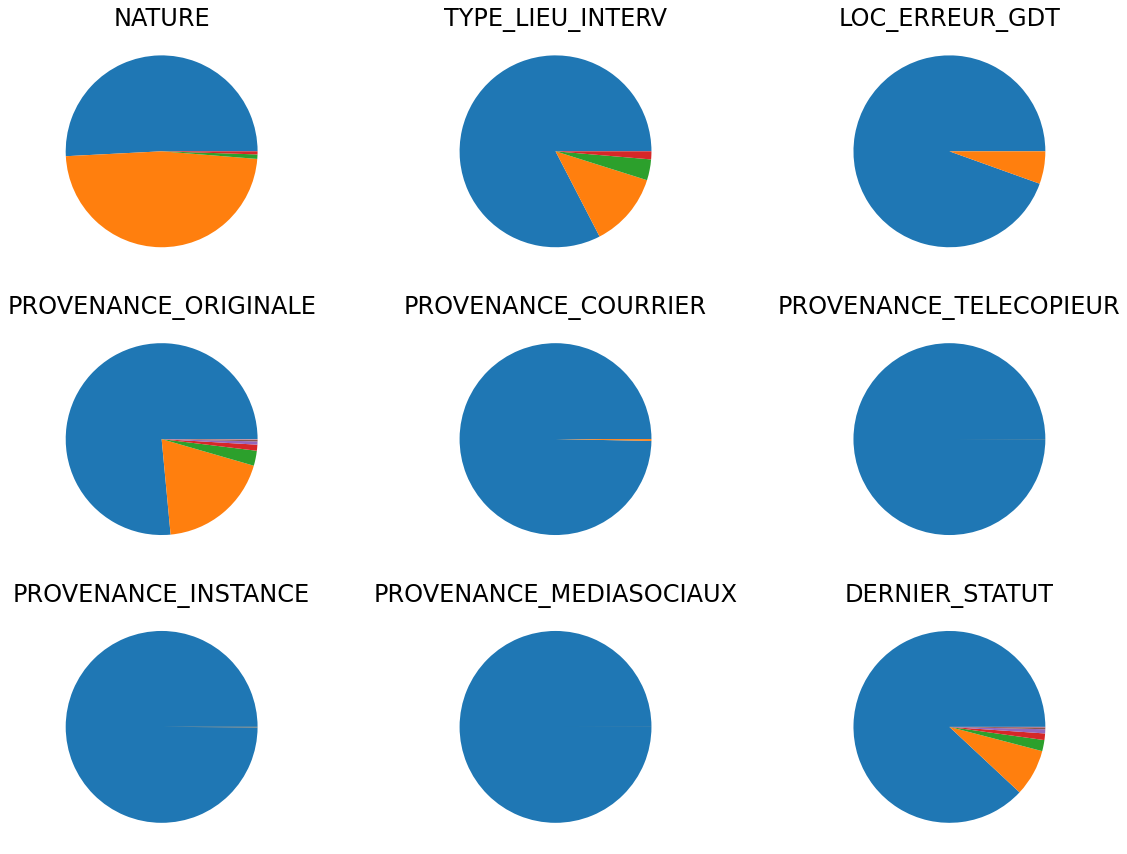

In [20]:
from math import ceil # round up
k = len(few)
# putting the pies in three rows
rc = 3
cc = int(ceil(k / rc)) # columns for the plots
fig, axs = plt.subplots(rc, cc)
i = 0 # the first plot goes on the first row
j = 0 # ... in the first column
for c in few: 
    freq = data[c].value_counts(dropna = True) # ignore any NaN values
    vals = data[c].unique()
    axs[i, j].set_title(c)
    axs[i, j].pie(freq)
    print(f'\nValue frequencies for column <{c}>:')
    print('\n'.join([f'{v}: {f}' for (v, f) in zip(vals, freq)]))
    j += 1
    if j == cc: # time for the second row
        i += 1
        j = 0 # continue at the first column

Those numerical codes 0, 1, 2, 3, ..., seems like categories. Let's consult [the source of the data](https://donnees.montreal.ca/ville-de-montreal/requete-311#methodology) to understand this better. All of the 'PROVENANCE' are *counters* for how many distinct contacts have there been per contact medium. 

So, the clearest *categorical* data we have is the column `NATURE` that has possible values 
"Information", "Commentaire", "Requete" y "Plainte" (the last one meaning "complaint"). It would be neat to be able to plot a map where each kind of record (row) has its own color. 

Remember that `valid` is the subset of data in which only those with valid geographical coordinates are included (some has mystery zero latitudes). Let's try to find a zone that incluides all four types of records:

In [21]:
kinds = valid.groupby('NATURE')
latavg = []
latsd = []
lonavg = []
lonsd = []
for kind in valid['NATURE'].unique():
    print('\n', kind)
    matches = kinds.get_group(kind)
    print(matches['LOC_LAT'].describe())
    latavg.append(matches['LOC_LAT'].mean())
    latsd.append(matches['LOC_LAT'].std())
    print(matches['LOC_LONG'].describe())
    lonavg.append(matches['LOC_LONG'].mean())
    lonsd.append(matches['LOC_LONG'].std())


 Requete
count   2220548.0000
mean         45.5333
std           0.0572
min          45.4027
25%          45.4979
50%          45.5284
75%          45.5677
max          45.7038
Name: LOC_LAT, dtype: float64
count   2220548.0000
mean        -73.6172
std           0.0753
min         -73.9769
25%         -73.6510
50%         -73.6018
75%         -73.5689
max         -73.4791
Name: LOC_LONG, dtype: float64

 Commentaire
count   23981.0000
mean       45.5351
std         0.0546
min        45.4028
25%        45.5012
50%        45.5388
75%        45.5660
max        45.7012
Name: LOC_LAT, dtype: float64
count   23981.0000
mean      -73.6062
std         0.0730
min       -73.9501
25%       -73.6287
50%       -73.5887
75%       -73.5646
max       -73.4802
Name: LOC_LONG, dtype: float64

 Plainte
count   34468.0000
mean       45.5338
std         0.0537
min        45.4153
25%        45.4961
50%        45.5331
75%        45.5651
max        45.7012
Name: LOC_LAT, dtype: float64
count   34468.0000
mea

Note that *none* of the `Information` category have valid geographical coordinates. We could pick a zone that is centered at the average of the means and a width of half the smallest standard deviation in total, for example.

In [22]:
import numpy as np # install with pip if you do not have NumPy yet
xcenter = np.mean(lonavg)
xspan = np.min(lonsd) / 4
ycenter = np.mean(latavg)
yspan = np.min(latsd) / 4
# build a zone to visualize
xlim = [xcenter - xspan, xcenter + xspan] # a quarter each side
ylim = [ycenter - yspan, ycenter + yspan]
print(xlim, ylim)

[-73.63181396539815, -73.59529663610562] [45.52064098269592, 45.547500754872814]


Let's make a zone and see if this cuts the dataset down to something that is easier to visualize.

In [23]:
# reorganize the info for a more geo-reference friendly format 
from shapely.geometry import Polygon # make sure shapely is installed with pip

# this is just a rectangle, really
zone = Polygon([(xlim[0], ylim[0]), 
                (xlim[0], ylim[1]), 
                (xlim[1], ylim[1]), 
                (xlim[1], ylim[0]), 
                (xlim[0], ylim[0])])
print('Selecting', zone)

# which points are inside this area
inside = valid.loc[ (valid['LOC_LONG'] > xlim[0]) & 
                    (valid['LOC_LONG'] < xlim[1]) &
                    (valid['LOC_LAT'] > ylim[0]) & 
                    (valid['LOC_LAT'] < ylim[1]) ]

print(len(inside), 'records in the zone')
print(inside['NATURE'].value_counts()) # how many of each kind

Selecting POLYGON ((-73.63181396539815 45.52064098269592, -73.63181396539815 45.547500754872814, -73.59529663610562 45.547500754872814, -73.59529663610562 45.52064098269592, -73.63181396539815 45.52064098269592))
126924 records in the zone
Requete        122937
Plainte          2132
Commentaire      1855
Name: NATURE, dtype: int64


Nice, that sounds manageable. Let's limit the streets to that same zone. 

In [24]:
r = vll.clip(zone) # clip the records with valid (lat, lon) coordinates
print(len(r), 'records clipped')
s = citystreets.clip(zone) # clip the street map further
print(len(s), 'streets in the zone')

126924 records clipped
1133 streets in the zone


OK, we are ready to make a map, again.

<AxesSubplot:>

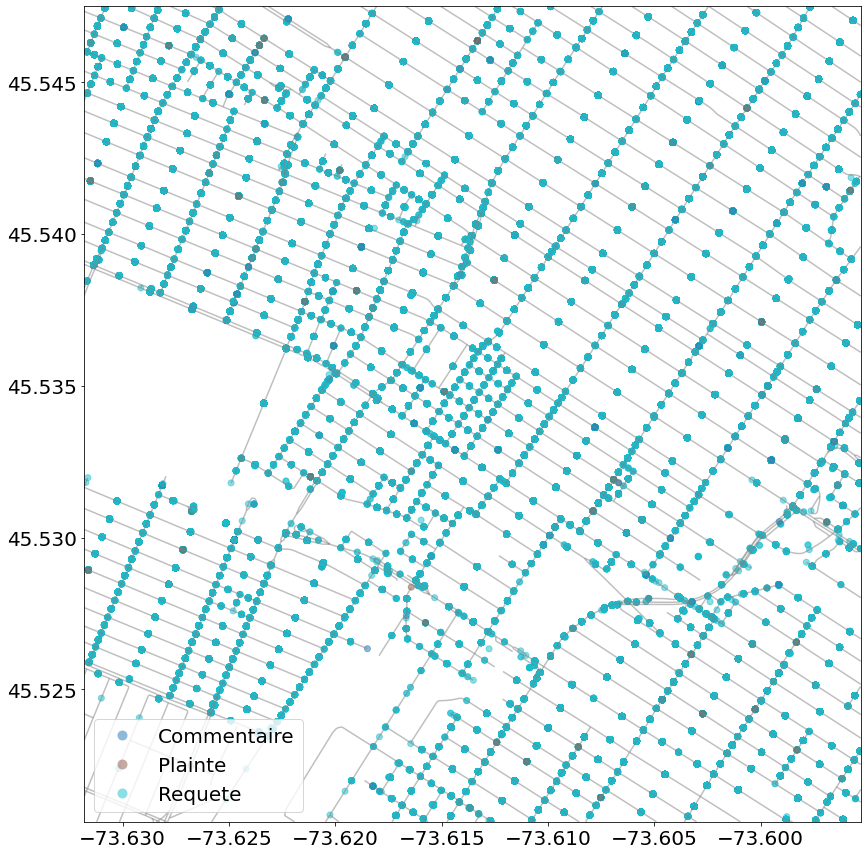

In [25]:
fig, ax = plt.subplots(1, 1)
plt.xlim(xlim)
plt.ylim(ylim)
s.plot(color = 'gray', ax = ax, alpha = 0.5) # draw the streets
# draw the records with colors by category and a legend
r.plot(column = 'NATURE', categorical = True, legend = True, alpha = 0.5, ax = ax) 

As expected, we really only see those of category "Requete" that is quite dominant in terms of frequency. The other two options are much more rare. Let's try to look at them without the dominant class and also without the streets.

Also, the colormap in the original plot is pretty bad: it is hard to distinguish between the tones. We can change it manually to [some other palette available in matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html?highlight=cmap).

<AxesSubplot:>

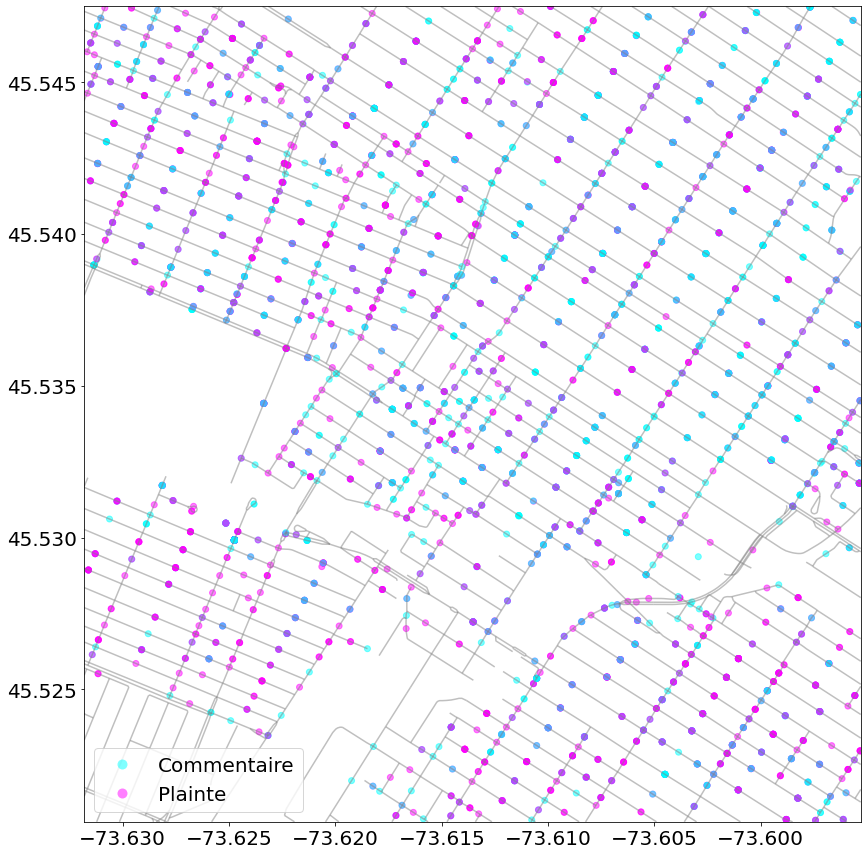

In [26]:
fig, ax = plt.subplots(1, 1)
plt.xlim(xlim)
plt.ylim(ylim)       
small = r.loc[r['NATURE'] != 'Requete']
s.plot(color = 'gray', ax = ax, alpha = 0.5) # draw the streets
small.plot(column = 'NATURE', cmap = 'cool', 
           categorical = True, legend = True, alpha = 0.5, ax = ax) 

We could also draw the underdog categories with bigger markers to be able to notice them better.  Let's create a new column for that.

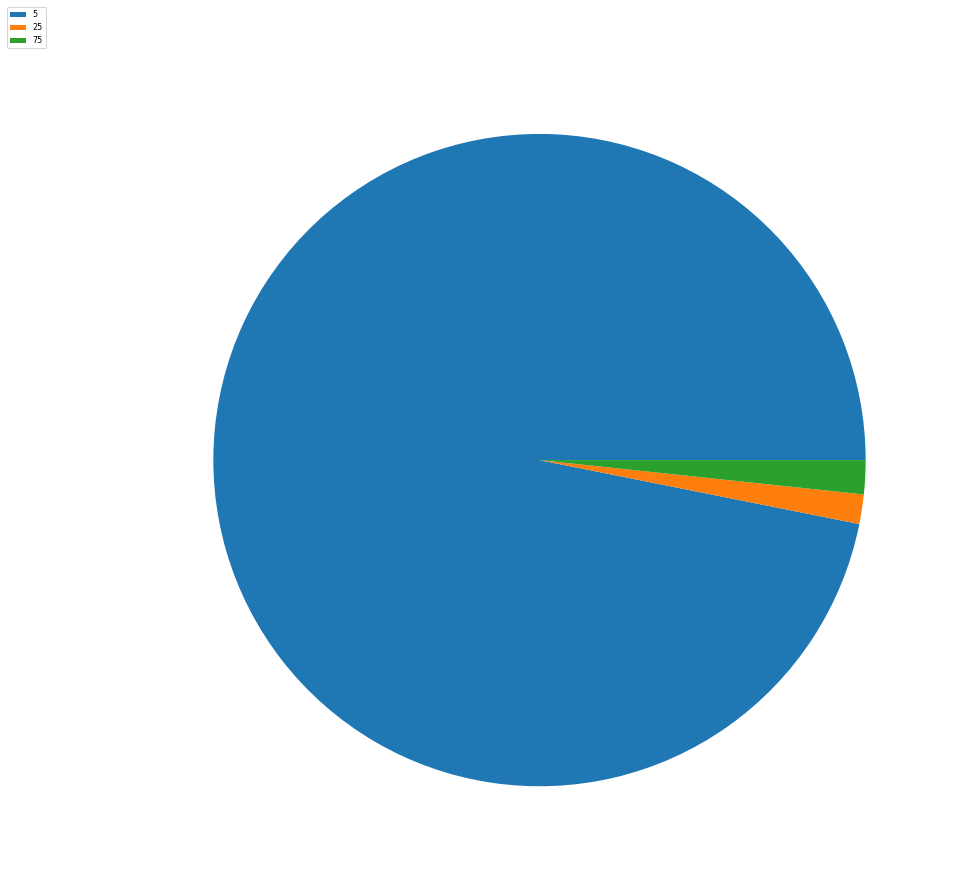

In [27]:
size = [ 5 + 20 * (v != 'Requete') + 50 * (v == 'Plainte') for v in r['NATURE'] ] 
from collections import Counter
c = Counter(size)
patches, texts = plt.pie(c.values())
plt.legend(patches,c.keys(), loc = 'lower right', 
           bbox_to_anchor = (-0.1, 1.), fontsize = 8)

Now there should be three different sizes of markers. It might be good to ditch the transparency (the `alpha` parameter) from the markers. Instead of drawing the streets, we could use a map background again.

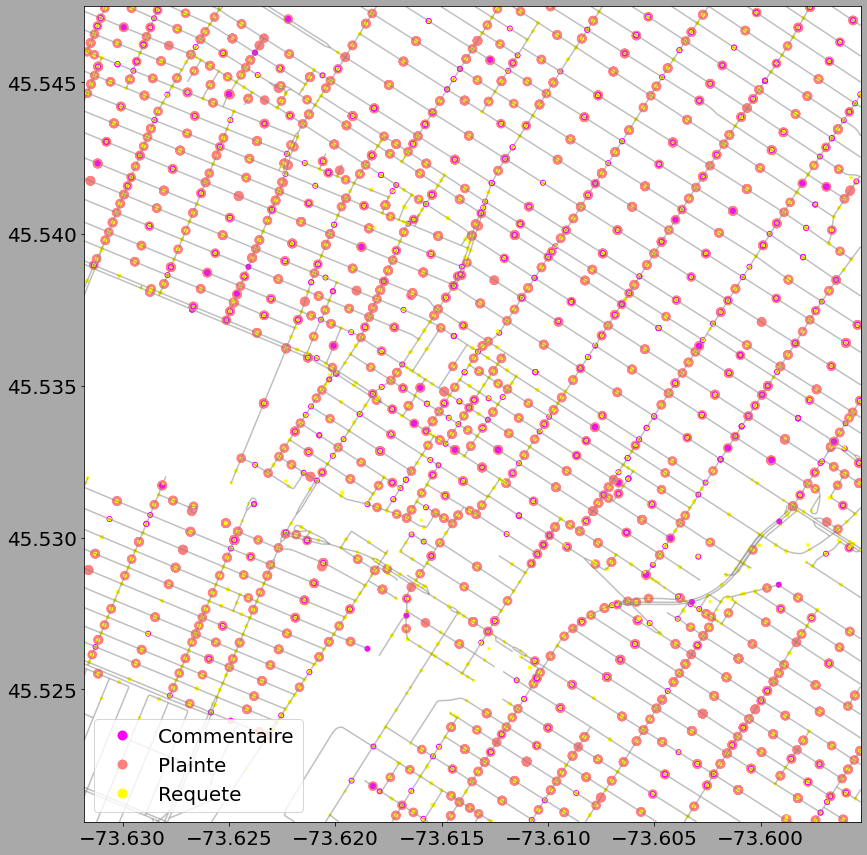

In [28]:
fig, ax = plt.subplots(1, 1)
plt.xlim(xlim)
plt.ylim(ylim)
s.plot(color = 'gray', ax = ax, alpha = 0.5) # draw the streets
r.plot(column = 'NATURE', 
       categorical = True, 
       legend = True, 
       cmap = 'spring', 
       markersize = size, 
       ax = ax) 
fig.set_facecolor('darkgray')

That `markersize` parameter does not seem to be a linear mapping of the numerical values given to it, but at least now there are visible differences. We could also make an *animation* to look at the kinds on at a time.

MovieWriter Pillow unavailable; using Pillow instead.


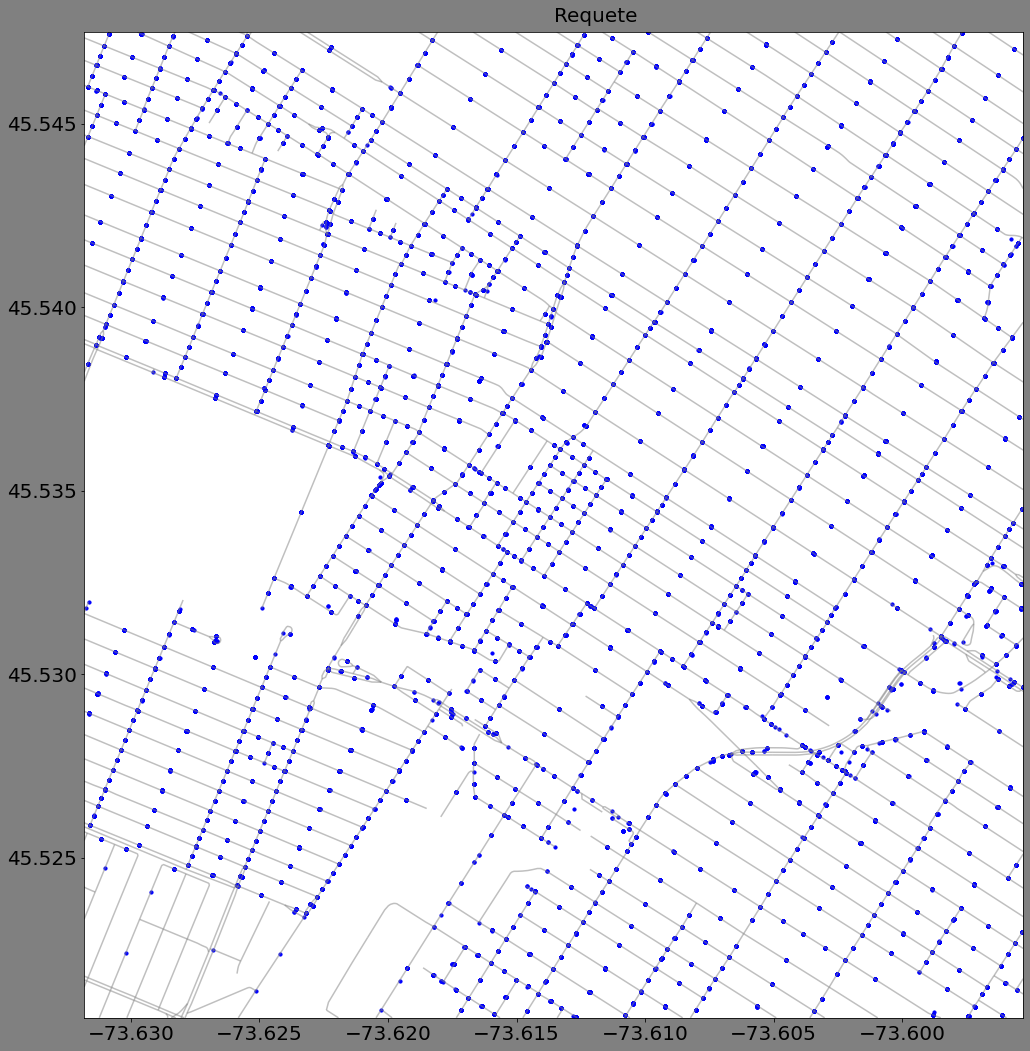

In [29]:
from celluloid import Camera #  install with pip
fig, ax = plt.subplots(1, 1)
cam = Camera(fig)
plt.xlim(xlim)
plt.ylim(ylim)
fig.set_facecolor('gray')
s.plot(color = 'gray', ax = ax, alpha = 0.5) # draw the streets once
c = [ 'red', 'purple', 'blue' ]
subsets = r.groupby(['NATURE'])
for kind, contents in subsets:
    ax.text(0.5, 1.01, kind, transform = ax.transAxes)
    s.plot(color = 'gray', ax = ax, alpha = 0.5) # streets
    contents.plot(color = c.pop(0), markersize = 10,  ax = ax) 
    fig.tight_layout()
    cam.snap()
ani = cam.animate()
# install Pillow with pip
# show each plot for one second
ani.save('kinds.gif', writer = 'Pillow', fps = 1) 

You can check [the resulting animation at GitHub](https://github.com/satuelisa/Requetes311/blob/main/kinds.gif).

In the [third part](https://github.com/satuelisa/Requetes311/blob/main/Temporal.ipynb), we look into the time series involved in this data set.